Risk: 0.002


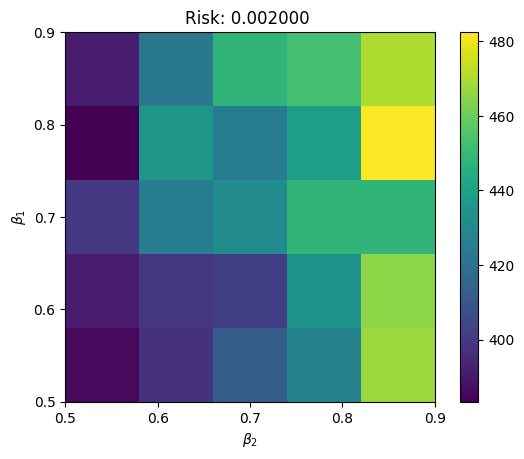

Risk: 1.000


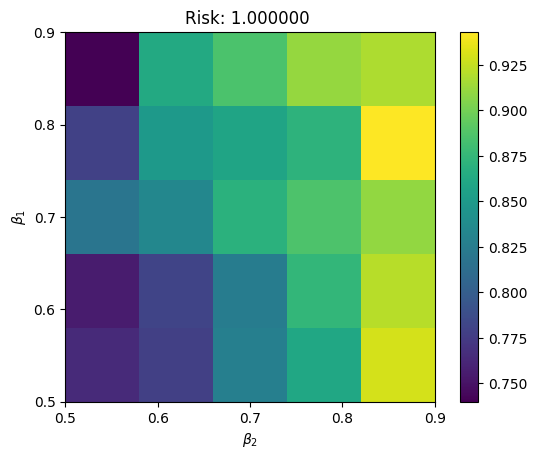

Risk: 2.000


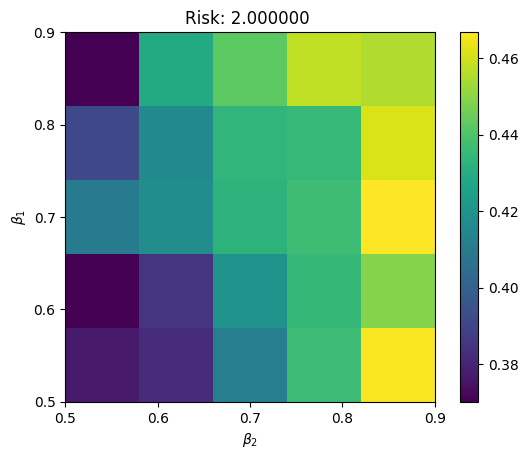

In [1]:
import numpy as np
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
from risks_and_discounts import f_linreg, phi_from_B, cov_from_B
from tqdm import tqdm
from functools import partial
from jax import jit, vmap
import jax.numpy as jnp
import jax

Bs = []
rho = 0.999
B = jnp.array([[1, rho], [rho, 1]])
Bs.append(B)
rho = 0.5
B = jnp.array([[1, rho], [rho, 1]])
Bs.append(B)
rho = 0.
B = jnp.array([[1, rho], [rho, 1]])
Bs.append(B)



for B in Bs:


    mini = 0.5
    maxi = 0.90
    betas = jnp.linspace(mini, maxi, 5)
    num_samples = 10000
    key = jax.random.PRNGKey(0)

    risk = B[0,0] + B[1,1] - 2 * B[0,1]
    print(f"Risk: {risk:.3f}")

    # Make grid of (beta1, beta2)
    beta1_grid, beta2_grid = jnp.meshgrid(betas, betas, indexing='ij')
    beta1_flat = beta1_grid.flatten()
    beta2_flat = beta2_grid.flatten()

    # Split keys
    keys = jax.random.split(key, beta1_flat.shape[0])

    # Partially apply fixed arguments
    phi_partial = partial(phi_from_B, B, f_linreg, num_samples=num_samples)
    cov_partial = partial(cov_from_B, B, f_linreg, num_samples=num_samples)

    # JIT and VMAP the function
    @jit
    def batch_phi(b1, b2, k):
        return phi_partial(b1, b2, k)
    @jit
    def batch_cov(b1, b2, k):
        return cov_partial(b1, b2, k)

    phi_vals = vmap(batch_phi)(beta1_flat, beta2_flat, keys)[:,0]
    cov_vals = vmap(batch_cov)(beta1_flat, beta2_flat, keys)[:,0,0]


    obj = phi_vals**2 / cov_vals
    obj_grid = obj.reshape(len(betas), len(betas))

    # Plotting
    fig, ax = plt.subplots()
    c = ax.imshow(obj_grid, extent=[mini, maxi, mini, maxi], origin='lower', cmap='viridis')
    ax.set_xticks(betas)
    ax.set_yticks(betas)
    ax.set_xlabel(r'$\beta_2$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_title(f'Risk: {risk:3f} ')
    fig.colorbar(c, ax=ax)
    plt.show()

Risk: 0.002


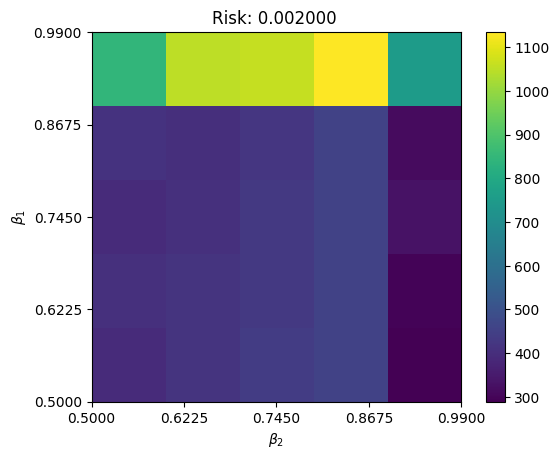

Risk: 1.000


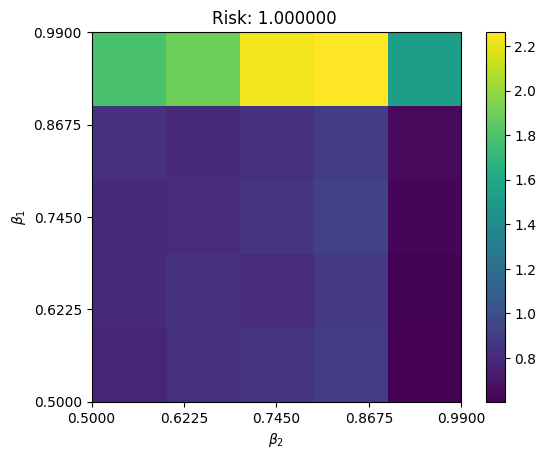

Risk: 2.000


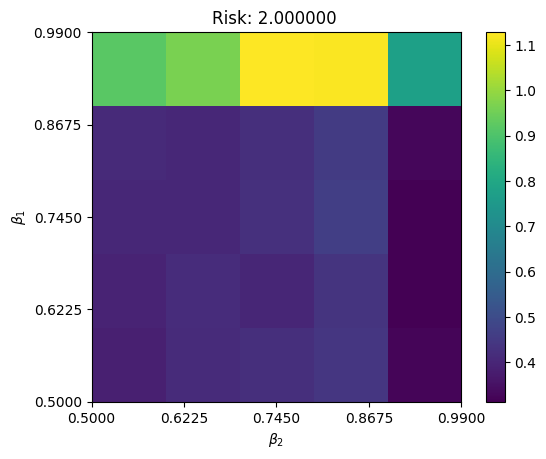

In [4]:
import numpy as np
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
from risks_and_discounts import f_linreg, phi_from_B, cov_from_B
from tqdm import tqdm
from functools import partial
from jax import jit, vmap
import jax.numpy as jnp
import jax

Bs = []
rho = 0.999
B = jnp.array([[1, rho], [rho, 1]])
Bs.append(B)
rho = 0.5
B = jnp.array([[1, rho], [rho, 1]])
Bs.append(B)
rho = 0.
B = jnp.array([[1, rho], [rho, 1]])
Bs.append(B)



for B in Bs:


    mini = 0.5
    maxi = 0.99
    betas = jnp.linspace(mini, maxi, 5)
    num_samples = 10000
    key = jax.random.PRNGKey(0)

    risk = B[0,0] + B[1,1] - 2 * B[0,1]
    print(f"Risk: {risk:.3f}")

    # Make grid of (beta1, beta2)
    beta1_grid, beta2_grid = jnp.meshgrid(betas, betas, indexing='ij')
    beta1_flat = beta1_grid.flatten()
    beta2_flat = beta2_grid.flatten()

    # Split keys
    keys = jax.random.split(key, beta1_flat.shape[0])

    # Partially apply fixed arguments
    phi_partial = partial(phi_from_B, B, f_linreg, num_samples=num_samples)
    cov_partial = partial(cov_from_B, B, f_linreg, num_samples=num_samples)

    # JIT and VMAP the function
    @jit
    def batch_phi(b1, b2, k):
        return phi_partial(b1, b2, k)
    @jit
    def batch_cov(b1, b2, k):
        return cov_partial(b1, b2, k)

    phi_vals = vmap(batch_phi)(beta1_flat, beta2_flat, keys)[:,0]
    cov_vals = vmap(batch_cov)(beta1_flat, beta2_flat, keys)[:,0,0]


    obj = phi_vals**2 / cov_vals
    obj_grid = obj.reshape(len(betas), len(betas))

    # Plotting
    fig, ax = plt.subplots()
    c = ax.imshow(obj_grid, extent=[mini, maxi, mini, maxi], origin='lower', cmap='viridis')
    ax.set_xticks(betas)
    ax.set_yticks(betas)
    ax.set_xlabel(r'$\beta_2$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_title(f'Risk: {risk:3f} ')
    fig.colorbar(c, ax=ax)
    plt.show()

In [3]:
betas

Array([0.5       , 0.6       , 0.7       , 0.79999995, 0.9       ],      dtype=float32)